# Help International clustering Assignment

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

## Data understanding and exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from random import sample
from numpy.random import uniform
from math import isnan

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

In [3]:
help_countries = pd.read_csv(r"C:\Users\Dell\Desktop\Clustering assignment\Country_data.csv")
help_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#basics of the dataframe
help_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


####### Hence by looking at the above info, it is clear that there are no missing values in the data set and so there is no need for imputation or removal of any data point.

####### Now we will convert the percentage values to absolute values for exports, health and imports columns.

In [5]:
help_countries['exports'] = round((help_countries['exports'] * help_countries['gdpp'])/100,2)
help_countries['health'] = round((help_countries['health'] * help_countries['gdpp'])/100,2)
help_countries['imports'] = round((help_countries['imports'] * help_countries['gdpp'])/100,2)

In [6]:
help_countries.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.30,1648.00,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.76,141.68,1458.66,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.20,4530.87,10847.10,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.70,5159.00,22418.20,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.12,343.39,1208.88,16000,13.800,69.1,1.92,5840


In [7]:
help_countries.shape

(167, 10)

In [8]:
help_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Univariate Analysis

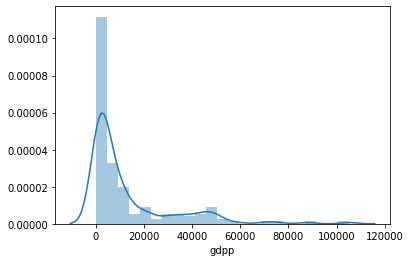

In [9]:
sns.distplot(help_countries['gdpp'])

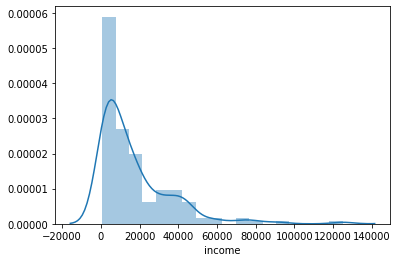

In [10]:
sns.distplot(help_countries['income'])

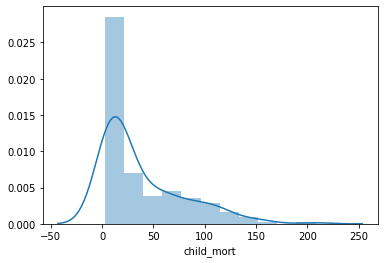

In [11]:
sns.distplot(help_countries['child_mort'])

In [12]:
## With this we can say that income,gdpp and child_mort are the highest in the range of mean and standard deviation with a decreasing trend as the values increase

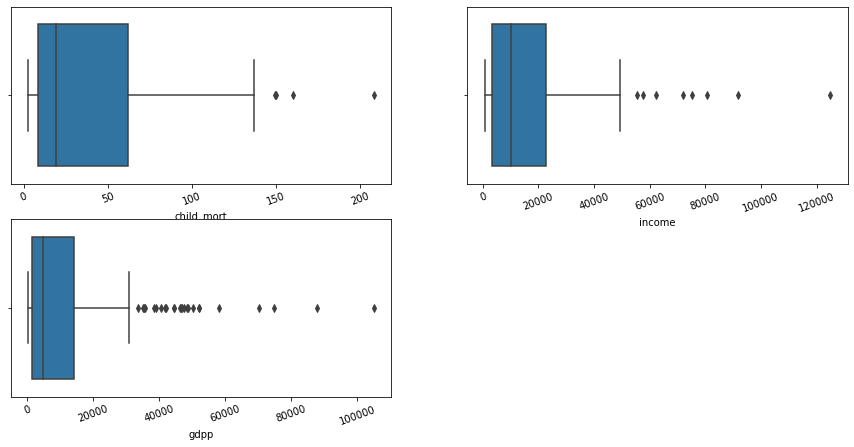

In [13]:
plt.figure(figsize=(15,15))
features = ['child_mort', 'income', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=help_countries)
    plt.xticks(rotation = 20)

In [14]:
Q1 = help_countries['child_mort'].quantile(0.05)
Q4 = help_countries['child_mort'].quantile(0.95)
help_countries['child_mort'][help_countries['child_mort'] <= Q1]=Q1
help_countries['child_mort'][help_countries['child_mort'] >= Q4]=Q4
help_countries.shape

(167, 10)

In [15]:
Q1 = help_countries['income'].quantile(0.05)
Q4 = help_countries['income'].quantile(0.95)
help_countries['income'][help_countries['income'] <= Q1]=Q1
help_countries['income'][help_countries['income'] >= Q4]=Q4
help_countries.shape

(167, 10)

In [16]:
Q1 = help_countries['gdpp'].quantile(0.05)
Q4 = help_countries['gdpp'].quantile(0.95)
help_countries['gdpp'][help_countries['gdpp'] <= Q1]=Q1
help_countries['gdpp'][help_countries['gdpp'] >= Q4]=Q4
help_countries.shape

(167, 10)

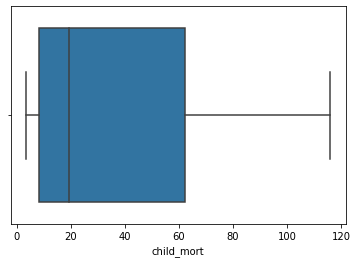

In [17]:
sns.boxplot(x='child_mort', data=help_countries)

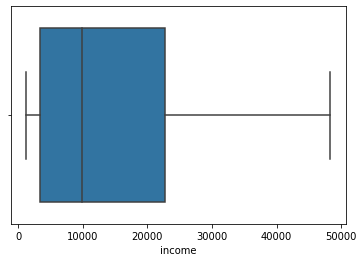

In [18]:
sns.boxplot(x='income', data=help_countries)

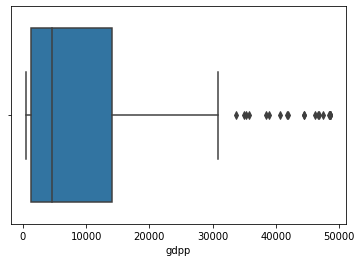

In [19]:
sns.boxplot(x='gdpp', data=help_countries)

## Bivariate Analysis

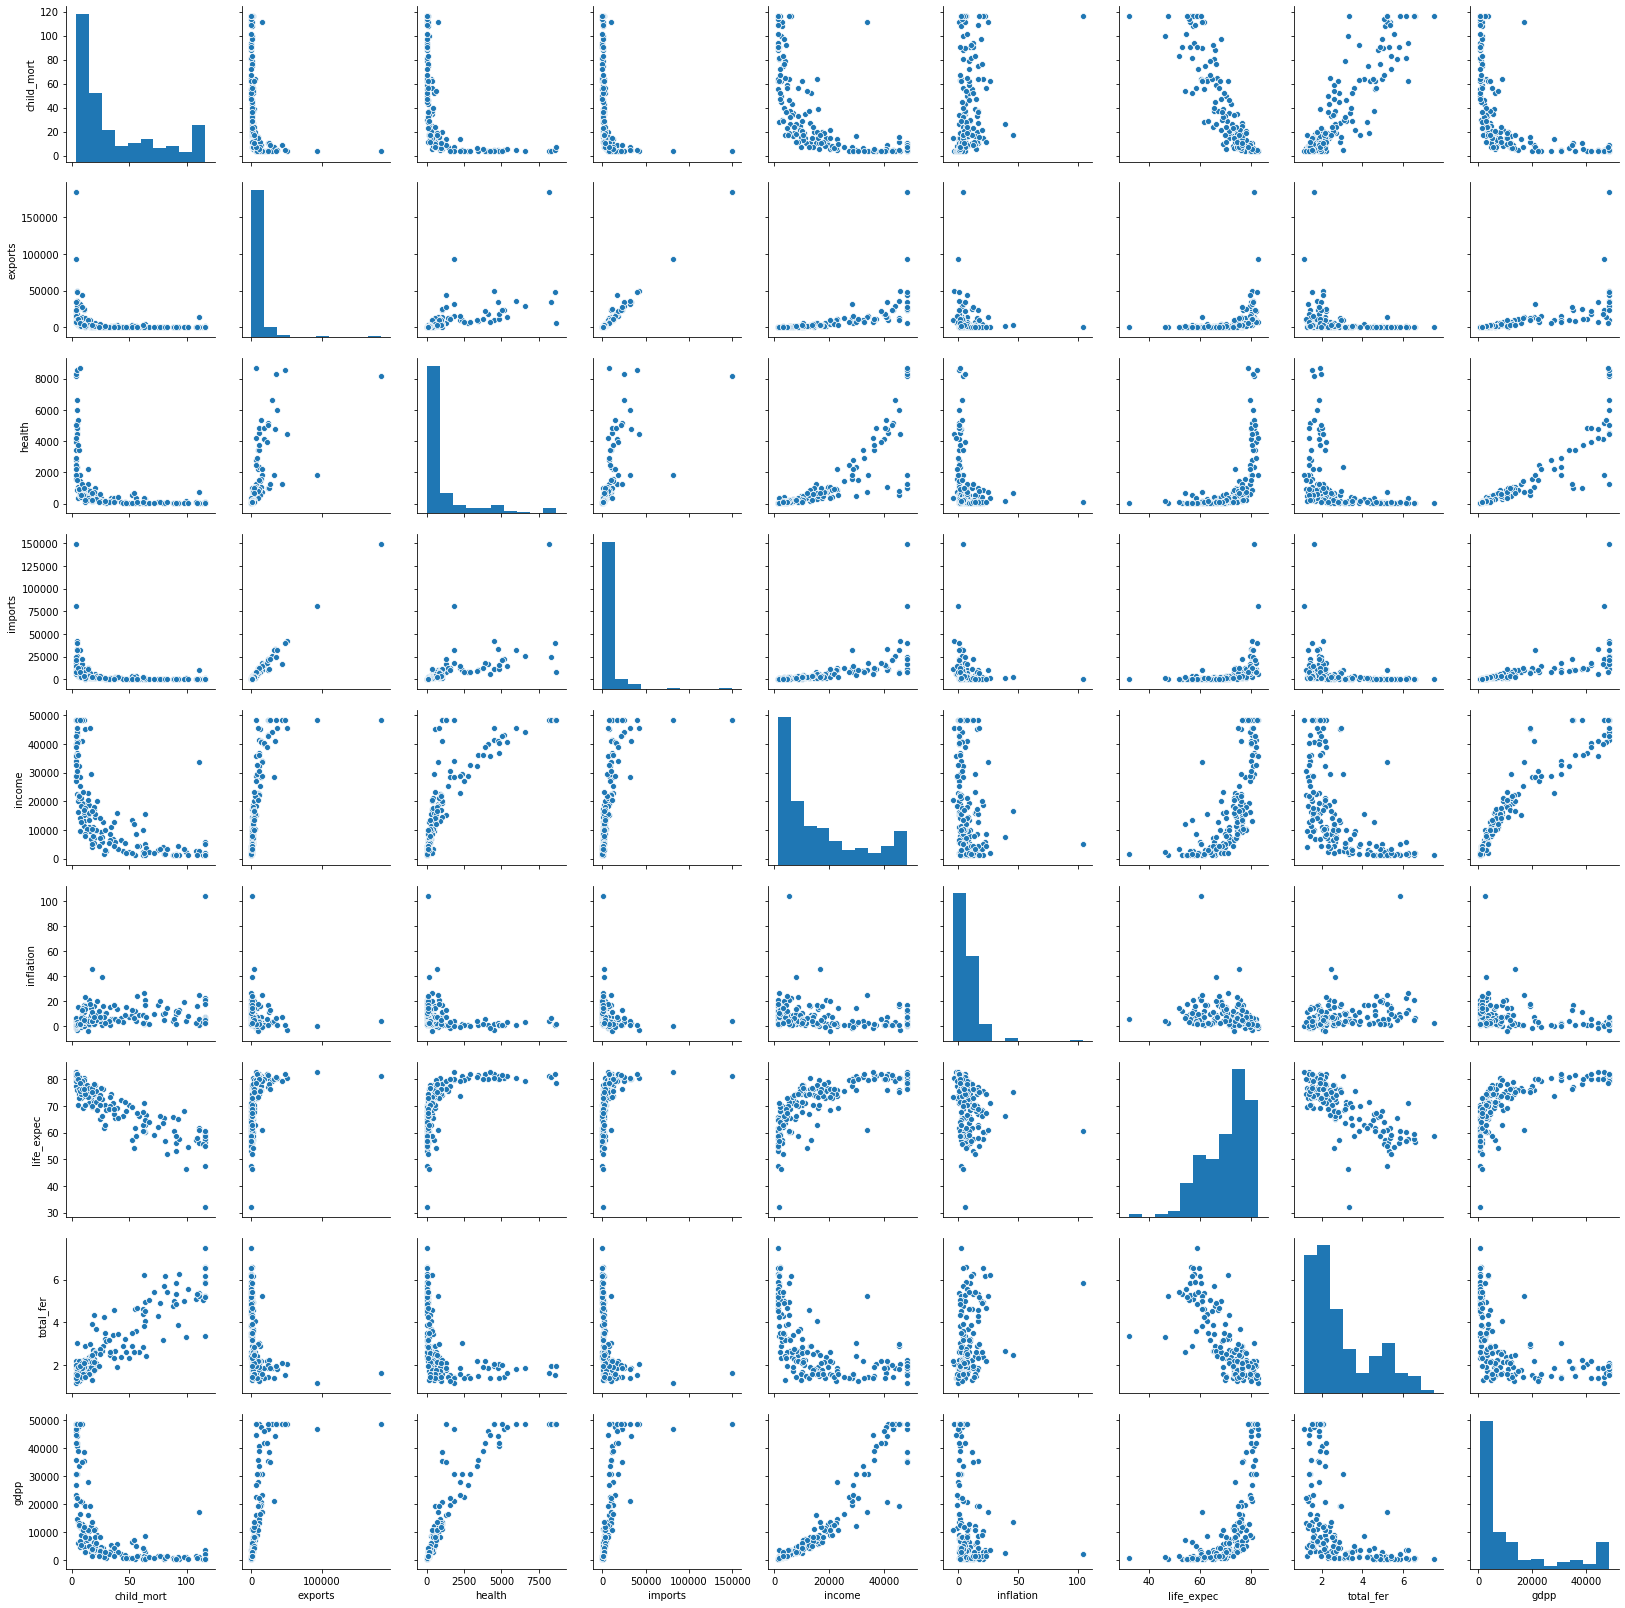

In [20]:
sns.pairplot(help_countries)
plt.show()

In [21]:
cor = help_countries.corr()
cor

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.312632,-0.455155,-0.336064,-0.637594,0.301262,-0.875859,0.890990,-0.557912
exports,-0.312632,1.000000,0.612919,0.987686,0.620288,-0.141553,0.377694,-0.291096,0.638305
health,-0.455155,0.612919,1.000000,0.638581,0.786203,-0.253956,0.545626,-0.407984,0.894022
imports,-0.336064,0.987686,0.638581,1.000000,0.609760,-0.179458,0.397515,-0.317061,0.639473
income,-0.637594,0.620288,0.786203,0.609760,1.000000,-0.189109,0.698170,-0.583061,0.941514
inflation,0.301262,-0.141553,-0.253956,-0.179458,-0.189109,1.000000,-0.239705,0.316921,-0.244688
life_expec,-0.875859,0.377694,0.545626,0.397515,0.698170,-0.239705,1.000000,-0.760875,0.649794
total_fer,0.890990,-0.291096,-0.407984,-0.317061,-0.583061,0.316921,-0.760875,1.000000,-0.500050
gdpp,-0.557912,0.638305,0.894022,0.639473,0.941514,-0.244688,0.649794,-0.500050,1.000000


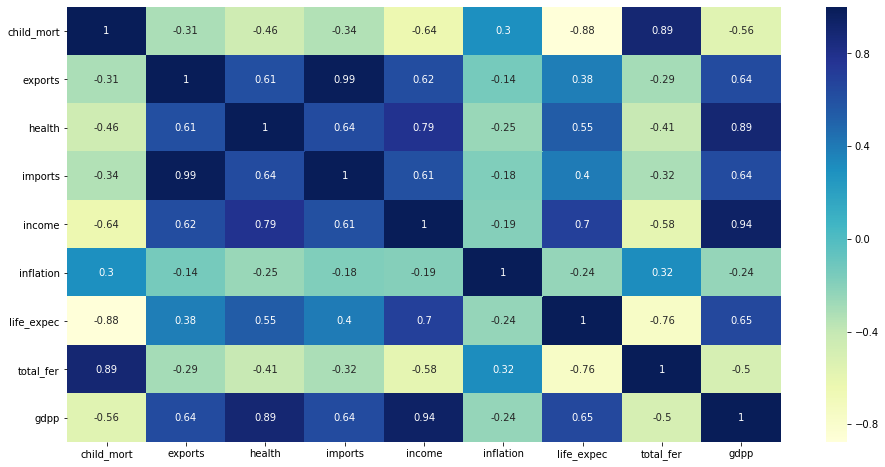

In [22]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [23]:
## Calculating the Hopkins statistic
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [24]:
# Let's check the hopkins measure
hopkins(help_countries.drop('country', axis=1))

0.9857650553689077

####### So if the hopkins measure is closer to 1, then the data is good for modelling. Hence we will use help_countries for modelling purposes.

In [25]:
# Now to perform clustering, we need to again drop the country column

help = help_countries.drop('country', axis = 1)
help.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0
3,116.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0


## Now let's scale the data

In [26]:
standard_scaler = StandardScaler()
help = standard_scaler.fit_transform(help)

In [27]:
help = pd.DataFrame(help)
help.columns = ["child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]
help.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-0.411011,-0.565038,-0.432275,-0.960575,0.157336,-1.619092,1.902882,-0.757874
1,-0.560024,-0.350191,-0.439215,-0.313677,-0.395590,-0.312347,0.647866,-0.859973,-0.523775
2,-0.263504,-0.318526,-0.484827,-0.353720,-0.193907,0.789274,0.670423,-0.038404,-0.499286
3,2.194560,-0.291375,-0.532366,-0.345953,-0.669255,1.387054,-1.179234,2.128151,-0.560839
4,-0.734610,-0.104331,-0.178771,0.040735,0.227115,-0.601749,0.704258,-0.541946,0.012991


### K Means clustering

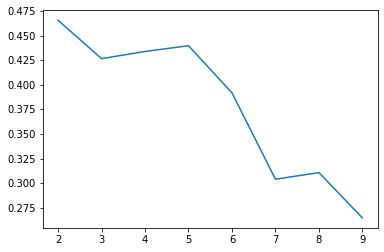

In [28]:
## Let's first look at the silhouette score and the elbow curve and analyse both for choosing the value of 'k'

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(help)
    ss.append([k, silhouette_score(help, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [29]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(help)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(help, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4657417362327912
For n_clusters=3, the silhouette score is 0.42665927826213607
For n_clusters=4, the silhouette score is 0.4339434875757255
For n_clusters=5, the silhouette score is 0.4398123055713431
For n_clusters=6, the silhouette score is 0.3900298666461222
For n_clusters=7, the silhouette score is 0.308271100611517
For n_clusters=8, the silhouette score is 0.310942123111772


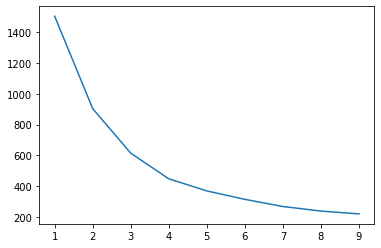

In [30]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(help)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

###### Hence looking at both, the silhouette score and the elbow curve, it is clear that we should choose k=3 for perorming KMeans clustering because there is no major change in the silhouette score after n_clusters = 3 and the elbow formation is exactly at point 3.

## K Means clustering on the basis of k=6

In [31]:
kmean = KMeans(n_clusters = 6, max_iter = 50, random_state = 50)
kmean.fit(help)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [32]:
## Let's make a copy of our original data before using it for analysis
help_countries_org = help_countries.copy()

In [33]:
help_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0
3,Angola,116.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0


In [34]:
col = help_countries.columns
col

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [35]:
# Let's add the cluster Ids to the original data 
help_countries_km = pd.concat([help_countries.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
help_countries_km.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp','cluster_id']
help_countries_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,3
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,3
3,Angola,116.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,5


In [36]:
help_countries_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [37]:
# Count of observations per cluster
help_countries_km['cluster_id'].value_counts()

3    70
1    46
5    29
0    19
2     2
4     1
Name: cluster_id, dtype: int64

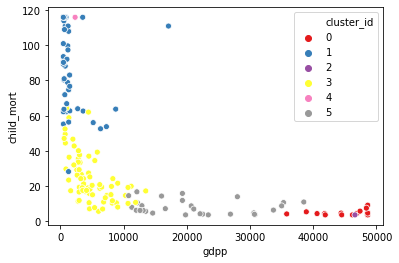

In [38]:
# Now let us plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = help_countries_km, palette='Set1')

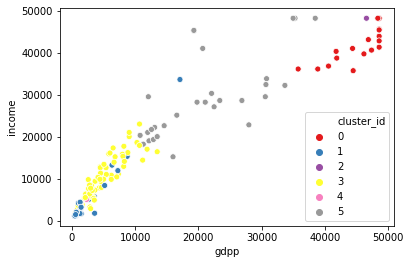

In [39]:
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = help_countries_km, palette='Set1')

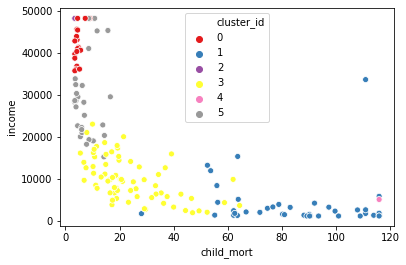

In [40]:
sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = help_countries_km, palette='Set1')

## Cluster Profiling

In [41]:
help_countries_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,3
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,3
3,Angola,116.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,5


In [42]:
help_countries_km.drop('country', axis = 1).groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,4.615789,23666.831579,5150.750000,20053.010526,42197.894737,1.616158,80.821053,1.804211,45562.105263
1,86.878261,865.925217,109.019130,820.814348,3739.500000,9.807283,59.039130,4.983043,1861.502174
2,3.460000,138475.000000,5001.930000,115092.000000,48290.000000,1.787000,82.000000,1.390000,47605.000000
3,24.420000,1824.514286,313.496714,2064.143143,10012.714286,8.386129,72.362857,2.389571,4862.457143
4,116.000000,589.490000,118.130000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000
5,7.952414,11878.810345,1432.018966,10565.886207,29474.827586,4.245552,77.293103,1.824828,21220.689655


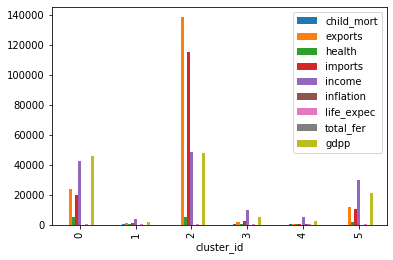

In [43]:
help_countries_km.drop('country', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

### Hence, from the above bar plot, it is clearly seen that choosing 6 clusters divides the countries into a many different clusters and hence not readable and appropriate according to the business aspects.

####### Now we will choose n_cllusters = 3 and perform our analysis:

In [44]:
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(help)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [45]:
## Let's make a copy of our original data before using it for analysis
help_countries_org = help_countries.copy()
help_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0
3,Angola,116.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0


In [46]:
# Let's add the cluster Ids to the original data 
help_countries_km = pd.concat([help_countries.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
help_countries_km.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp','cluster_id']
help_countries_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,116.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,1


In [47]:
help_countries_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [48]:
# Count of observations per cluster
help_countries_km['cluster_id'].value_counts()

1    88
2    48
0    31
Name: cluster_id, dtype: int64

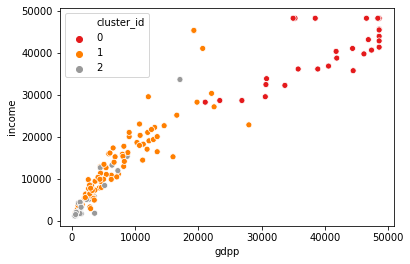

In [49]:
# Now let us plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = help_countries_km, palette='Set1')

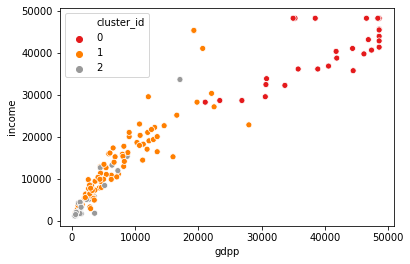

In [50]:
# Now let us plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = help_countries_km, palette='Set1')

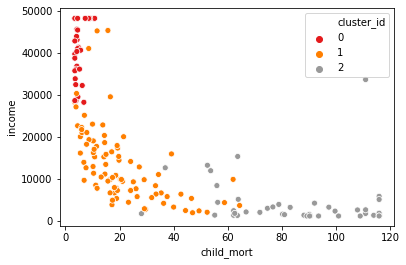

In [51]:
# Now let us plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = help_countries_km, palette='Set1')

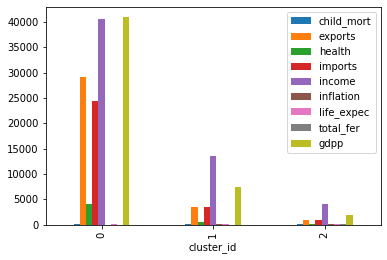

In [52]:
help_countries_km.drop('country', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

####### So by looking at the above plots, we can see that gdpp and income are lesser and child_mort is high in cluster_id= 2 as compared to other clusters.

#### Hence we can see from the above bar plot that cluster_id = 2 has the countries with the least gdpp, income and high child_mort rate which also satisfies the problem statement.

### With the above 2 different analysis of different k, i.e. k=6 and k=3, it is clearly seen that choosing 6 clusters divides the countries into a many different clusters and hence not readable and appropriate according to the business aspects. However choosing k=3 is logical according to the business aspects because of a clear differentiation between developed, developing and under developed countries.

In [53]:
help_countries_km[help_countries_km['cluster_id']==2].sort_values(by=["gdpp", 'income', 'child_mort'], ascending=[True, True, False]) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
31,Central African Republic,116.0,52.63,17.75,118.19,1213.0,2.010,47.5,5.21,465.9,2
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,1213.0,20.800,57.5,6.54,465.9,2
112,Niger,116.0,77.26,17.96,170.87,1213.0,2.550,58.8,7.49,465.9,2
106,Mozambique,101.0,131.99,21.83,193.58,1213.0,7.640,54.5,5.56,465.9,2
26,Burundi,93.6,20.61,26.80,90.55,1213.0,12.300,57.7,6.26,465.9,2
94,Malawi,90.5,104.65,30.25,160.19,1213.0,12.100,53.1,5.31,465.9,2
88,Liberia,89.3,62.46,38.59,302.80,1213.0,5.470,60.8,5.02,465.9,2
132,Sierra Leone,116.0,67.03,52.27,137.66,1220.0,17.200,55.0,5.20,465.9,2
93,Madagascar,62.2,103.25,15.57,177.59,1390.0,8.790,60.8,4.60,465.9,2
50,Eritrea,55.2,23.09,12.82,112.31,1420.0,11.600,61.7,4.61,482.0,2


## Hence the top 5 countries as per cluster_id = 2 that are in the direst need of aid are Central African Republic, Congo Dem Rep, Niger, Mozambique and Burundi. 

# Hierarchical Clustering

In [54]:
help.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-0.411011,-0.565038,-0.432275,-0.960575,0.157336,-1.619092,1.902882,-0.757874
1,-0.560024,-0.350191,-0.439215,-0.313677,-0.395590,-0.312347,0.647866,-0.859973,-0.523775
2,-0.263504,-0.318526,-0.484827,-0.353720,-0.193907,0.789274,0.670423,-0.038404,-0.499286
3,2.194560,-0.291375,-0.532366,-0.345953,-0.669255,1.387054,-1.179234,2.128151,-0.560839
4,-0.734610,-0.104331,-0.178771,0.040735,0.227115,-0.601749,0.704258,-0.541946,0.012991


In [55]:
help_countries_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,116.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,1


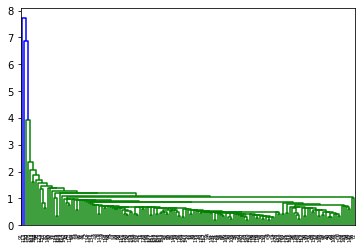

In [56]:
# Performing single linkage on the scaled data set

mergings = linkage(help, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

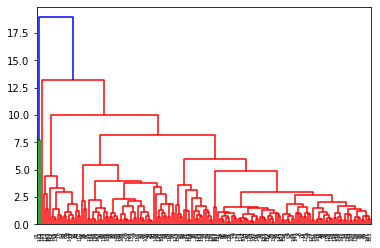

In [57]:
# Performing complete linkage on the scaled dataset

mergings = linkage(help, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [58]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 4, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [59]:
# assign cluster labels
help_countries_km['cluster_labels'] = cluster_labels
help_countries_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,116.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,1,1


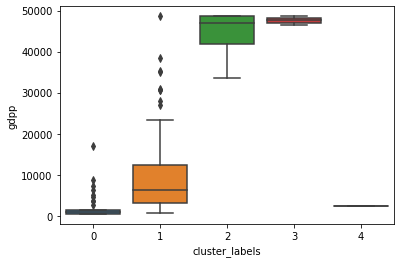

In [60]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=help_countries_km)

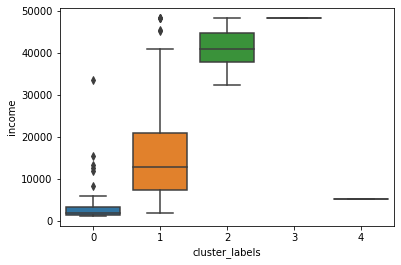

In [61]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=help_countries_km)

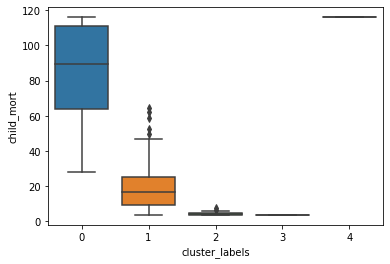

In [62]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=help_countries_km)

#### Hence we can see from the above box plot that cluster_id = 0 has the countries with the least gdpp, income and high child_mort as compared to other clusters.

In [63]:
help_countries_km[help_countries_km['cluster_labels']==0].sort_values(by=["gdpp", 'income', 'child_mort'], ascending=[True, True, False]) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
31,Central African Republic,116.0,52.63,17.75,118.19,1213.0,2.010,47.5,5.21,465.9,2,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,1213.0,20.800,57.5,6.54,465.9,2,0
112,Niger,116.0,77.26,17.96,170.87,1213.0,2.550,58.8,7.49,465.9,2,0
106,Mozambique,101.0,131.99,21.83,193.58,1213.0,7.640,54.5,5.56,465.9,2,0
26,Burundi,93.6,20.61,26.80,90.55,1213.0,12.300,57.7,6.26,465.9,2,0
94,Malawi,90.5,104.65,30.25,160.19,1213.0,12.100,53.1,5.31,465.9,2,0
88,Liberia,89.3,62.46,38.59,302.80,1213.0,5.470,60.8,5.02,465.9,2,0
132,Sierra Leone,116.0,67.03,52.27,137.66,1220.0,17.200,55.0,5.20,465.9,2,0
93,Madagascar,62.2,103.25,15.57,177.59,1390.0,8.790,60.8,4.60,465.9,2,0
50,Eritrea,55.2,23.09,12.82,112.31,1420.0,11.600,61.7,4.61,482.0,2,0


### Hence, the top 5 countries according to the hierarchical clustering are:

##### Central African Republic
##### Congo Dem Rep 
##### Niger
##### Mozambique 
##### Burundi

## To conclude, we have got the same results matching for both the methods, namely, KMeans and Hierarchical clusteriing.